# Imports and config 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report


from src.infrastructure.feature_extractor import fingerprint_features

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:

from src.domain.models import (model_cnn_single, 
                               model_cnn_multi,
                               model_definition_flat,
                               model_definition_deep, 
                               model_str_single, 
                               evaluate_model)

ImportError: cannot import name 'evaluate_model' from 'src.domain.models' (c:\users\brunosiarry\pycharmprojects\testservier\testservier\src\domain\models.py)

# Opening files

Remarques : 
* Aucunes valeurs nulles


## df single

In [5]:
df_single = pd.read_csv("../data/dataset_single.csv")
df_single.head(3)

P1      mol_id                                             smiles
0   1  CID2999678    Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1   0  CID2999679                Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2   1  CID2999672  COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...

In [6]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      4999 non-null   int64 
 1   mol_id  4999 non-null   object
 2   smiles  4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [7]:
df_single.P1.value_counts()

1    4108
0     891
Name: P1, dtype: int64

In [7]:
df_single.mol_id.nunique()

4999

<AxesSubplot:>

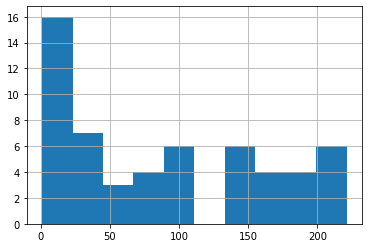

In [7]:
df_single.smiles.apply(len).value_counts().hist()

## df multi

In [8]:
df_multi = pd.read_csv("../data/dataset_multi.csv")
df_multi.head(3)

P2  P1  P3  P4  P5  P6  P7  P8  P9      mol_id  \
0   1   1   1   1   1   1   1   0   1  CID2999678   
1   0   0   1   1   0   0   0   1   1  CID2999679   
2   1   1   0   1   1   1   1   1   1  CID2999672   

                                              smiles  
0    Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C  
1                Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1  
2  COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...

In [9]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P2      4999 non-null   int64 
 1   P1      4999 non-null   int64 
 2   P3      4999 non-null   int64 
 3   P4      4999 non-null   int64 
 4   P5      4999 non-null   int64 
 5   P6      4999 non-null   int64 
 6   P7      4999 non-null   int64 
 7   P8      4999 non-null   int64 
 8   P9      4999 non-null   int64 
 9   mol_id  4999 non-null   object
 10  smiles  4999 non-null   object
dtypes: int64(9), object(2)
memory usage: 429.7+ KB


## Features 

In [10]:
df_features = df_single.smiles.apply(fingerprint_features)

In [11]:
df_features.shape

(4999,)

In [12]:
df_features.head(3).values

array([<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x0000025C6B8A29E0>,
      dtype=object)

In [13]:
df_features.dtypes

dtype('O')

In [14]:
df_features.sample(10)

793     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
115     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
383     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2670    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
775     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
197     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1182    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
850     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4083    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
291     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: smiles, dtype: object

In [15]:
from rdkit.DataStructs.cDataStructs import ExplicitBitVect

In [16]:
df_features_list = df_features.apply(lambda x:x.ToList())
df_features_list.head(3)

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: smiles, dtype: object

In [17]:
df_features_list.apply(len).value_counts()

2048    4999
Name: smiles, dtype: int64

# Correlation with the target

Comments : strong linearity std <=> mean ... (Could be mock data ?)

In [22]:
target = df_single.P1

In [18]:
series_feat = df_single.smiles.apply(fingerprint_features).apply(lambda x:x.ToList())
series_feat.head(3)

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: smiles, dtype: object

In [23]:
df_stats = pd.DataFrame()
df_stats['100mean'] = series_feat.apply(lambda x:np.mean(x)*100)
df_stats['std'] = series_feat.apply(lambda x:np.std(x))
df_stats['target'] = target

df_stats.head(3)

100mean       std  target
0  1.904297  0.136676       1
1  2.148438  0.144992       0
2  3.076172  0.172671       1

<AxesSubplot:>

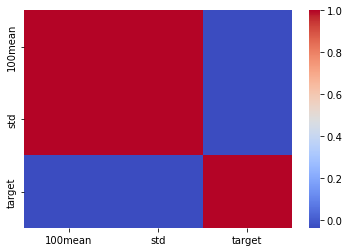

In [24]:
sns.heatmap(df_stats.corr(), cmap="coolwarm")

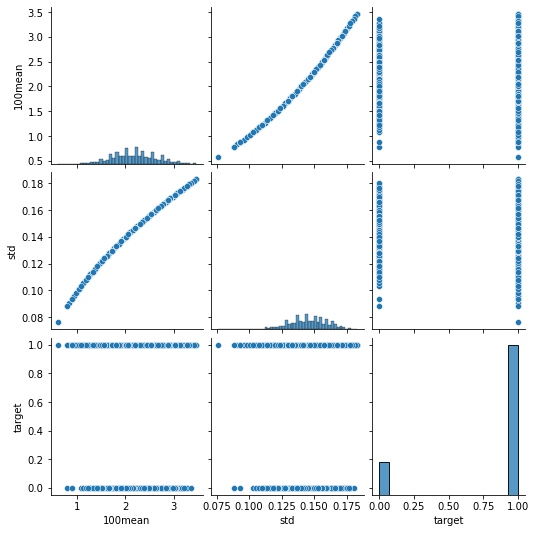

In [25]:
sns.pairplot(df_stats)

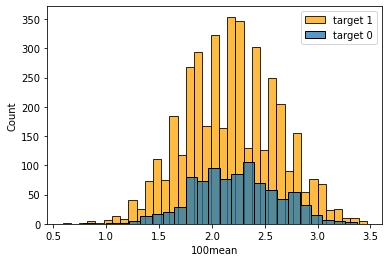

In [26]:
sns.histplot(df_stats[df_stats['target']==1]['100mean'], color="orange")
sns.histplot(df_stats[df_stats['target']==0]['100mean'])
plt.legend(['target 1', 'target 0'])

In [27]:
df_single['P1'].value_counts(normalize=1)

1    0.821764
0    0.178236
Name: P1, dtype: float64

# Data preparation

## Feature and target definition

In [14]:
import rdkit

In [15]:
rdkit.__version__

'2022.03.2'

In [13]:
df_single.smiles.apply(fingerprint_features).values

array([<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001B19A3AFCA0>,
       ...,
      dtype=object)

In [8]:
features_array = np.array(df_single.smiles.apply(fingerprint_features)
                          .apply(lambda x:x.ToList()).to_list())
#features_array = np.array(df_features_list.to_list())
features_array 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
target = df_single.P1
target

0       1
1       0
2       1
3       0
4       1
       ..
4994    1
4995    1
4996    1
4997    1
4998    1
Name: P1, Length: 4999, dtype: int64

## Splitting

In [30]:
# have a validation and a test

ft_train, ft_test, y_train, y_test = train_test_split(features_array, target, test_size=0.2)

In [31]:
features_array.shape

(4999, 2048)

In [32]:
target.shape

(4999,)

# Models

## Model 1

In [16]:
model = model_cnn_single()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2041, 10)          90        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1020, 10)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 1013, 10)          810       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 506, 10)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5060)              0         
                                                                 
 dense_7 (Dense)             (None, 200)              

In [41]:
model.fit(ft_train, y_train,
          validation_data=(ft_test, y_test),
          epochs=10,
          batch_size=100,
          verbose=1)

Epoch 1/10
40/40 [==============================] - 3s 65ms/step - loss: 0.6715 - accuracy: 0.8045 - val_loss: 0.4968 - val_accuracy: 0.8410
Epoch 2/10
40/40 [==============================] - 2s 61ms/step - loss: 0.5128 - accuracy: 0.8170 - val_loss: 0.4581 - val_accuracy: 0.8410
Epoch 3/10
40/40 [==============================] - 2s 60ms/step - loss: 0.4885 - accuracy: 0.8170 - val_loss: 0.4429 - val_accuracy: 0.8410
Epoch 4/10
40/40 [==============================] - 2s 60ms/step - loss: 0.4823 - accuracy: 0.8170 - val_loss: 0.4403 - val_accuracy: 0.8410
Epoch 5/10
40/40 [==============================] - 2s 60ms/step - loss: 0.4793 - accuracy: 0.8170 - val_loss: 0.4419 - val_accuracy: 0.8410
Epoch 6/10
40/40 [==============================] - 2s 60ms/step - loss: 0.4805 - accuracy: 0.8170 - val_loss: 0.4393 - val_accuracy: 0.8410
Epoch 7/10
40/40 [==============================] - 2s 62ms/step - loss: 0.4778 - accuracy: 0.8170 - val_loss: 0.4420 - val_accuracy: 0.8410
Epoch 8/10
40

<AxesSubplot:>

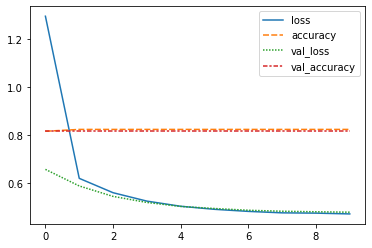

In [164]:
sns.lineplot(data=model.history.history)

## Model 2

### String exploration

In [6]:
df_single.smiles

0         Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1                     Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2       COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3       O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4                               NC(=O)NC(Cc1ccccc1)C(=O)O
                              ...                        
4994         CC1CCC(NC(=O)CN2CCCN(Cc3ccc(F)cc3Cl)C2=O)CC1
4995                  Cc1cccc(-n2cnc(C(=O)Nc3cccnc3)c2)n1
4996                  COc1ccc(CCNC(=O)c2noc3c2CCCC3)cc1OC
4997                             COCc1ccc2oc(C(=O)O)cc2c1
4998        Cc1ccc(/C=C2\C(=O)NC(=O)N(Cc3ccccc3Cl)C2=O)o1
Name: smiles, Length: 4999, dtype: object

In [26]:
symbols_smiles = set("".join(df_single.smiles))
print(len(symbols_smiles), "symbols : ", symbols_smiles)

29 symbols :  {'2', 'H', 'c', '6', '+', 'N', 's', '(', 'C', 'n', '\\', '-', '#', 'B', '3', 'F', '5', 'S', '=', '4', '1', '[', '/', 'o', 'O', ')', 'l', 'r', ']'}


In [27]:
feature_list_2 = [[smiles.count(s) for s in symbols_smiles] 
                  for smiles in df_single.smiles.values]

pd.Series(feature_list_2)

0       [2, 0, 6, 0, 0, 2, 0, 5, 17, 0, 0, 0, 0, 0, 2,...
1       [2, 0, 15, 0, 0, 1, 0, 2, 3, 2, 0, 0, 0, 0, 0,...
2       [2, 0, 18, 0, 0, 3, 0, 4, 8, 0, 0, 0, 0, 0, 2,...
3       [4, 0, 12, 0, 0, 2, 0, 4, 8, 0, 0, 0, 0, 0, 0,...
4       [0, 0, 6, 0, 0, 2, 0, 3, 4, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4994    [2, 0, 6, 0, 0, 3, 0, 4, 15, 0, 0, 0, 0, 0, 2,...
4995    [2, 0, 13, 0, 0, 1, 0, 3, 2, 4, 0, 1, 0, 0, 2,...
4996    [2, 0, 9, 0, 0, 1, 0, 2, 9, 1, 0, 0, 0, 0, 2, ...
4997    [2, 0, 8, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, ...
4998    [2, 0, 10, 0, 0, 2, 0, 4, 8, 0, 1, 0, 0, 0, 2,...
Length: 4999, dtype: object

In [28]:
len(feature_list_2[0])

29

## Splitting new features

In [34]:
features = list(feature_list_2)
target = list(df_single.P1)

ft_train, ft_test, y_train, y_test = train_test_split(features,
                                                                target, 
                                                                test_size=0.2)

## Model 2 with character count

In [46]:
model = model_str_single()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               3840      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)              

In [47]:
29*128+128

3840

In [50]:
model.fit(ft_train, y_train,
          validation_data=(ft_test, y_test),
          epochs=30,
          batch_size=1000,
          verbose=0)

<AxesSubplot:>

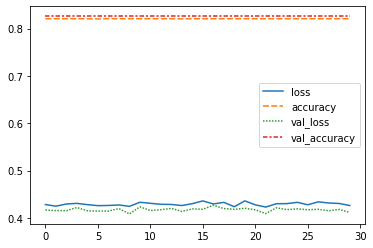

In [51]:
sns.lineplot(data=model.history.history)

On est pas sur du modèle grandiose. Pas de crainte d'overfit ...

# Performance

In [43]:
roc_auc_score(y_test, model.predict(ft_test))

0.5

In [44]:
classification_report(y_test, model.predict(ft_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets